# Doctor's Consultation Fees Prediction

Predict A Doctor's Consultation Fee 



We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

Size of training set: 5961 records

Size of test set: 1987 records



FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.

# Target

Consultation Fee

# Importing Libraries

In [1544]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import classification_report
from scipy.stats import skew
from sklearn.preprocessing import power_transform
from sklearn import metrics
from sklearn.impute import SimpleImputer
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,mean_squared_error,roc_curve,precision_recall_curve
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

# Importing datasets i.e Train and Test

In [1545]:
tr=pd.read_excel("Final_Train.xlsx")

In [1546]:
ts=pd.read_excel("Final_Test.xlsx")

In [1547]:
tr.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [1548]:
ts.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


loading first 5 rows for tain and test data

In [1549]:
tr.shape, ts.shape

((5961, 7), (1987, 6))

In [1550]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


The train data has  5961 rows and 7 columns

In [1551]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


The train data has 1987  rows and 6 columns

In [1552]:
tr.describe(include='all')

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
count,5961,5961,2659,5936,5961,3341,5961.000000
unique,1420,64,51,877,6,2998,NaN
top,BDS,9 years experience,100%,"HSR Layout, Bangalore",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,NaN
freq,488,323,684,75,1397,40,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,307.944640
std,NaN,NaN,NaN,NaN,NaN,NaN,190.920373
min,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,150.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,300.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,500.000000


In [1553]:
ts.describe(include='all')

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
count,1987,1987,897,1981,1987,1153
unique,630,57,36,592,6,1084
top,BAMS,10 years experience,100%,"Andheri West, Mumbai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...
freq,153,110,223,27,444,10


In [1554]:
tr.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [1555]:
ts.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

There are null values present in both train and test data

In [1556]:
tr['Rating'].replace('(%)','',regex=True,inplace=True)
ts['Rating'].replace('(%)','',regex=True,inplace=True)
tr.Rating=tr.Rating.astype('float32')
ts.Rating=ts.Rating.astype('float32')

removing % symbol from rating column and converting it to Float column

In [1557]:
tr.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [1558]:
tr['Place']=tr['Place'].str.extract(r'.* (.*)')
ts['Place']=ts['Place'].str.extract(r'.* (.*)')

Extracting values from place columns for future analysis

In [1559]:
tr.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100.0,Ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98.0,Bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,Bangalore,ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,Bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100.0,Chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [1560]:
tr['Experience']=tr['Experience'].str.extract(r'(^\d{1,2}) .*')
ts['Experience']=ts['Experience'].str.extract(r'(^\d{1,2}) .*')
tr.Experience=tr.Experience.astype('int64')
ts.Experience=ts.Experience.astype('int64')

Extracting values from Experience columns and converting them to int values

In [1561]:
tr['Place'].unique()

array(['Ernakulam', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Coimbatore', 'Mumbai', 'Thiruvananthapuram', nan], dtype=object)

Looking for unique columns in Place column 

In [1562]:
tr['Place'].fillna('Ernakulam',inplace=True)
ts['Place'].fillna('Bangalore',inplace=True)
tr.Place.isnull().sum()
ts.Place.isnull().sum()

0

replacing null values for Place column in both the datasets

In [1563]:
tr.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100.0,Ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98.0,Bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,Bangalore,ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,Bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100.0,Chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [1564]:

tr['Miscellaneous_Info'].fillna('Unknown',inplace=True)
ts['Miscellaneous_Info'].fillna('Unknown',inplace=True)


Filling null values in profile column with median

In [1565]:
tr.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100.0,Ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98.0,Bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,Bangalore,ENT Specialist,Unknown,300
3,"BSc - Zoology, BAMS",12,NaN,Bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100.0,Chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [1566]:
tr.Rating.fillna(tr['Rating'].mean(),inplace=True)
ts.Rating.fillna(tr['Rating'].mean(),inplace=True)

replacing null values in Miscellaneous_Info column with mean

In [1567]:
tr.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100.000000,Ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98.000000,Bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,94.643478,Bangalore,ENT Specialist,Unknown,300
3,"BSc - Zoology, BAMS",12,94.643478,Bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100.000000,Chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


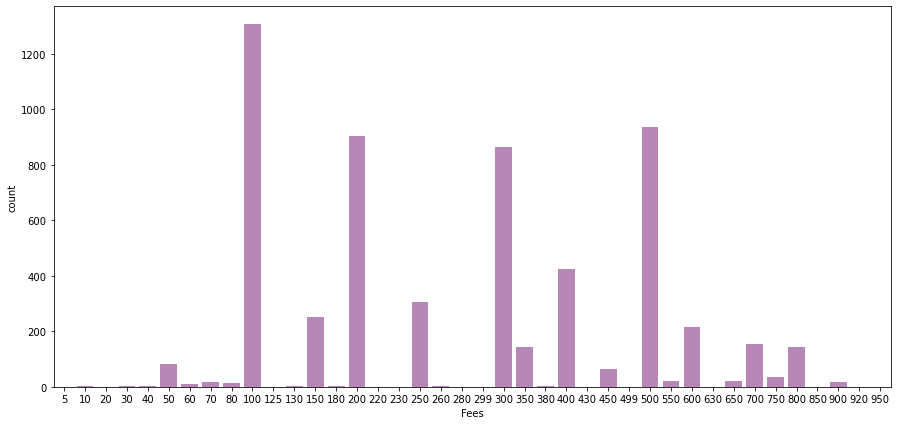

In [1568]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(tr['Fees'].sort_values(), ax=ax, color='purple', alpha=0.5)
plt.show()

The above plot shows the distribution of fees

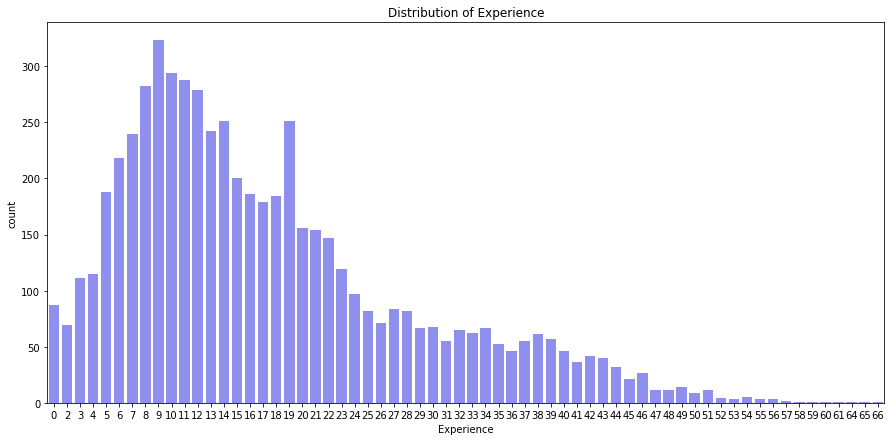

In [1569]:

fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(tr['Experience'], ax=ax, color='blue', alpha=0.5)
ax.set(title='Distribution of Experience')
plt.show()

The above plot shows the distribution of Experience

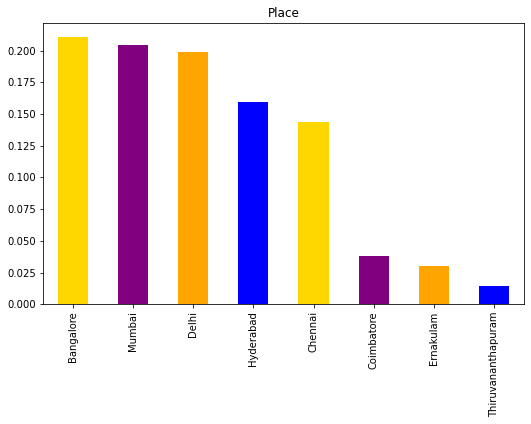

In [1570]:
plt.figure(1)
plt.subplot(555)
tr['Place'].value_counts(normalize=True).plot.bar(figsize=(50,30),title= 'Place',color=['gold', 'purple','orange','blue'])

plt.show()

The above plot shows that the City Bangalore has the highest number of feedbacks followed by  Mumbai and other cities

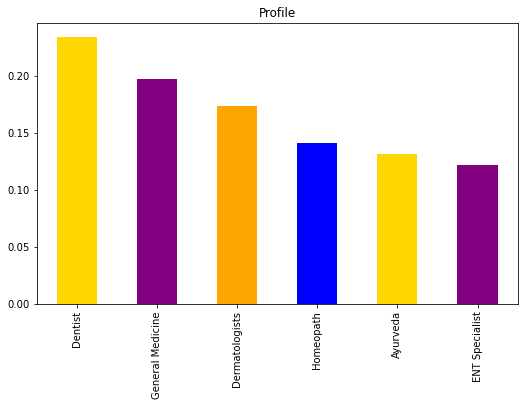

In [1571]:
plt.figure(1)
plt.subplot(555)
tr['Profile'].value_counts(normalize=True).plot.bar(figsize=(50,30),title= 'Profile',color=['gold', 'purple','orange','blue'])

plt.show()

The above plot shows that Dentist has the highest number of feedbacks followed by  General Medicine and other Profiles

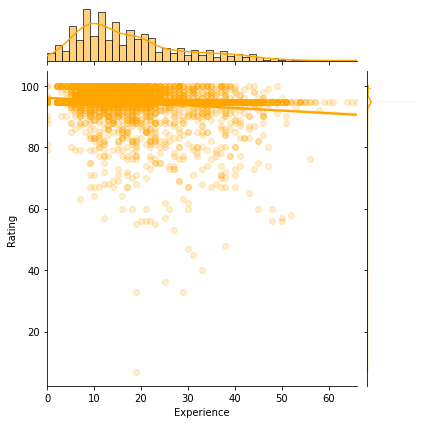

In [1572]:

sns.jointplot(tr['Experience'], tr['Rating'], color='orange', kind="reg", fit_reg=True, joint_kws={'scatter_kws':{"alpha": 0.2}})
plt.show()

The above visualization shows the relation between Rating and Experience

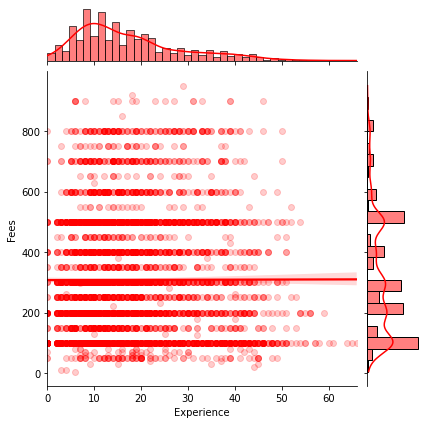

In [1573]:
sns.jointplot(tr['Experience'], tr['Fees'], color='red', kind="reg", fit_reg=True,joint_kws={'scatter_kws':{"alpha": 0.2}})
plt.show()


The above visualization shows the relation between Esperience and Fees

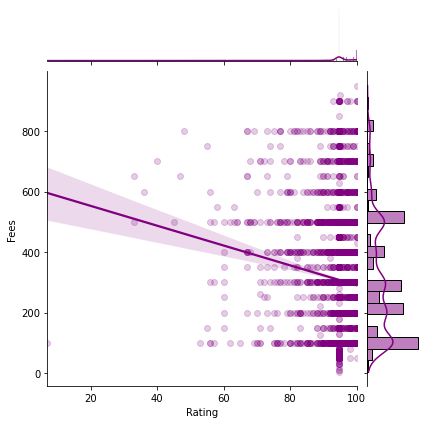

In [1574]:

sns.jointplot(tr['Rating'], tr['Fees'], color='purple', kind="reg", fit_reg=True,joint_kws={'scatter_kws':{"alpha": 0.2}})
plt.show()

The above visualization shows the relation between Rating and Fees

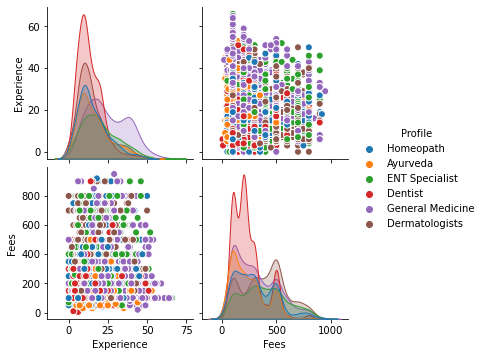

In [1575]:

sns.pairplot(tr.dropna().drop(['Rating','Place'], axis=1), kind="scatter", hue="Profile", plot_kws=dict(s=50, edgecolor="white", linewidth=1))
plt.show()


The above visualization shows the relation of Profile with place and rating

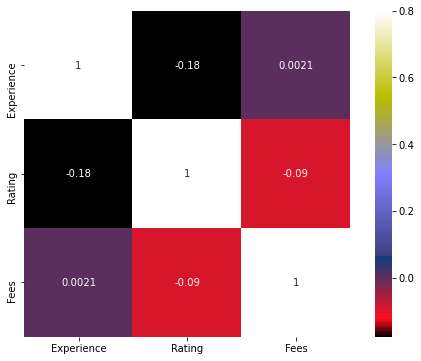

In [1576]:
corr_matrix = tr.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr_matrix, vmax=.8, annot=True, square=True, cmap="gist_stern");

<AxesSubplot:>

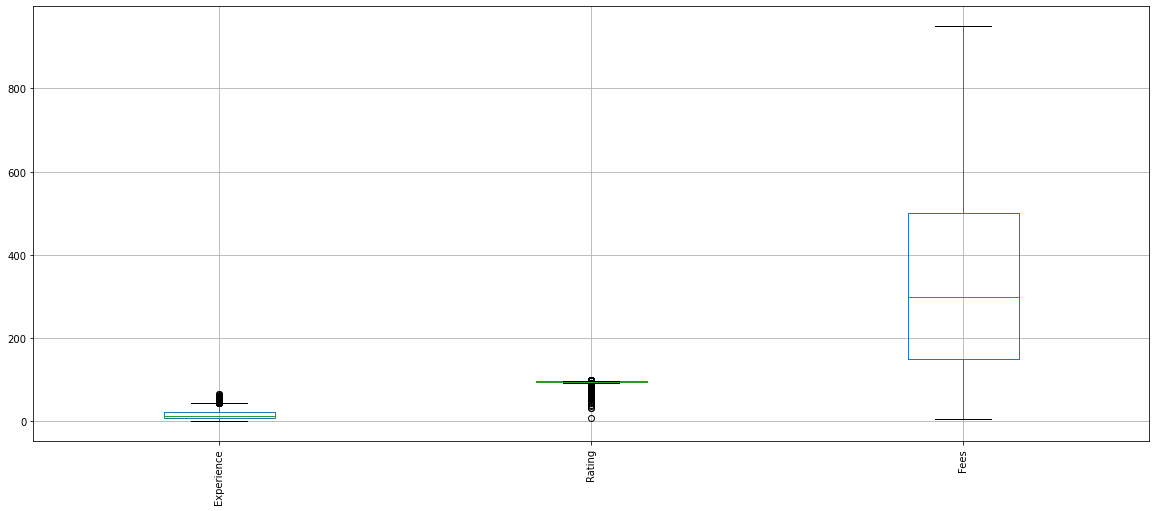

In [1577]:
tr.boxplot( rot = 90, figsize=(20,8))

<AxesSubplot:>

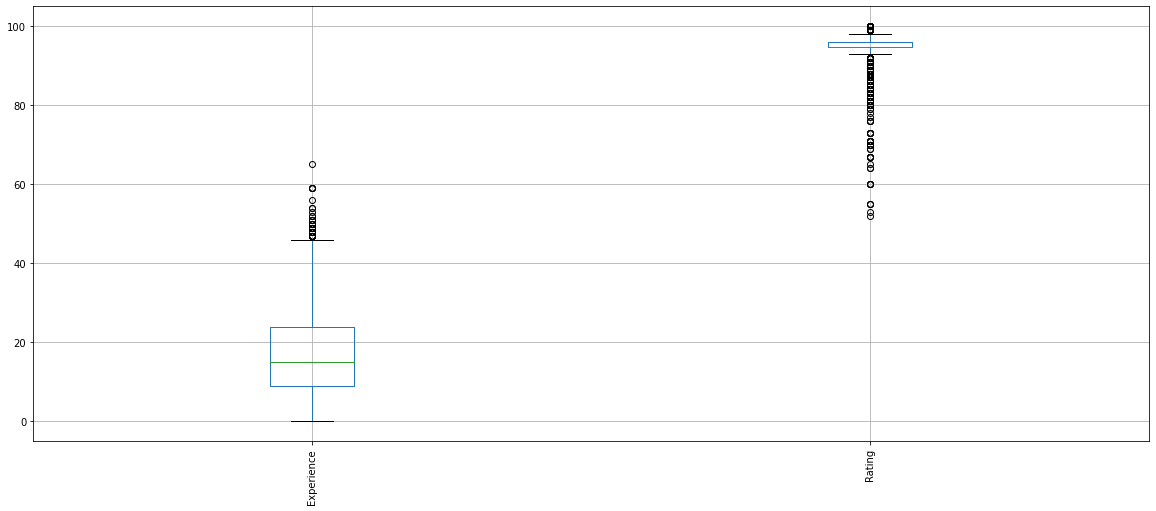

In [1578]:
ts.boxplot( rot = 90, figsize=(20,8))

In [1579]:
tr.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100.000000,Ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98.000000,Bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,94.643478,Bangalore,ENT Specialist,Unknown,300
3,"BSc - Zoology, BAMS",12,94.643478,Bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100.000000,Chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [1580]:
f=['Rating','Experience']
from scipy.stats import zscore
z=np.abs(zscore(tr[f]))
z1=np.abs(zscore(ts[f]))
tr_new=tr[(z<3).all(axis=1)]
ts_new=ts[(z1<3).all(axis=1)]
print('\n Train',tr.shape)
print('\n Test',ts.shape)
print('\n Train new',tr_new.shape)
print('\n Test new',ts_new.shape)
tr=tr_new
ts=ts_new


 Train (5961, 7)

 Test (1987, 6)

 Train new (5800, 7)

 Test new (1934, 6)


In [1581]:
ts.skew()

Experience    0.887877
Rating       -1.398633
dtype: float64

<AxesSubplot:ylabel='Frequency'>

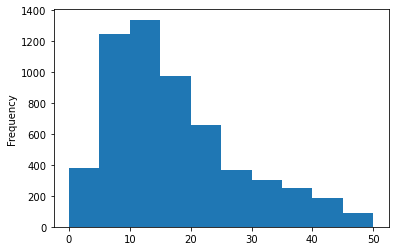

In [1582]:
tr['Experience'].plot.hist()

-0.003200130848213014


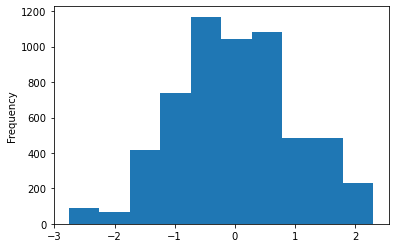

In [1583]:
tr['Experience']=power_transform(tr[['Experience']], method='yeo-johnson')
tr['Experience'].plot.hist()
print(skew(tr['Experience']))

<AxesSubplot:ylabel='Frequency'>

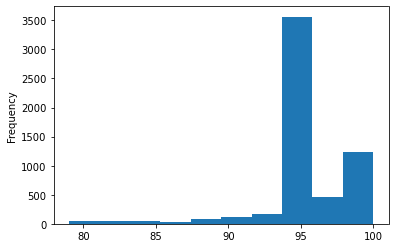

In [1584]:
tr['Rating'].plot.hist()

0.12033062428236008


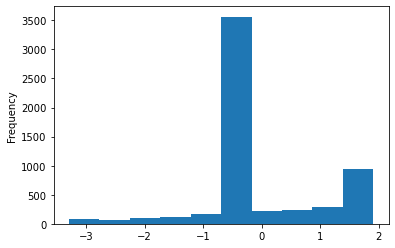

In [1585]:
tr['Rating']=power_transform(tr[['Rating']], method='yeo-johnson')
tr['Rating'].plot.hist()
print(skew(tr['Rating']))

<AxesSubplot:ylabel='Frequency'>

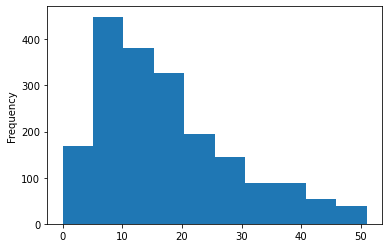

In [1586]:
ts['Experience'].plot.hist()

-0.003640850611287517


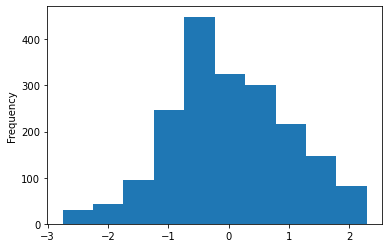

In [1587]:
ts['Experience']=power_transform(ts[['Experience']], method='yeo-johnson')
ts['Experience'].plot.hist()
print(skew(ts['Experience']))

<AxesSubplot:ylabel='Frequency'>

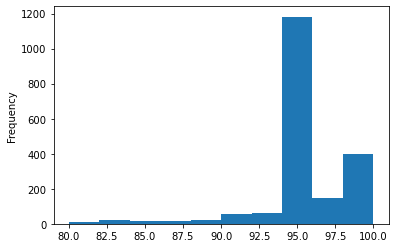

In [1588]:
ts['Rating'].plot.hist()

0.11296724528074265


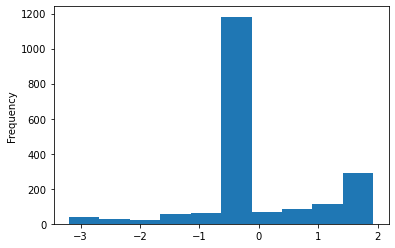

In [1589]:
ts['Rating']=power_transform(ts[['Rating']], method='yeo-johnson')
ts['Rating'].plot.hist()
print(skew(ts['Rating']))

Skewness has been removed form Traning as well as testing columns

In [1590]:
tr['Qualification_No.'] = tr.Qualification.apply(lambda x: len((str(x).split(','))))
ts['Qualification_No.'] = ts.Qualification.apply(lambda x: len((str(x).split(','))))

Splitting data in Qualification_No column

In [1591]:
tr['ExpperQual']=pd.Series(np.sqrt((((tr['Experience'])**2)/((tr['Qualification_No.'])**2))))
ts['ExpperQual']=pd.Series(np.sqrt((((ts['Experience'])**2)/((ts['Qualification_No.'])**2))))

Creating new column based on experience per qualification

In [1592]:
tr['Miscinfo']=tr['Miscellaneous_Info'].apply(lambda x:len(str(x).split(',')))
ts['Miscinfo']=ts['Miscellaneous_Info'].apply(lambda x:len(str(x).split(',')))

creating new column by splitting Miscellaneous_Info column

In [1593]:
tr.drop(columns=['Qualification','Miscellaneous_Info'],inplace=True)
ts.drop(columns=['Qualification','Miscellaneous_Info'],inplace=True)

Dropping Qualification and Miscellaneous_Info column from the dataset

In [1594]:
tr['RatingperQual']=((tr['Rating']*0.01)/tr['Qualification_No.'])
ts['RatingperQual']=((ts['Rating']*0.01)/ts['Qualification_No.'])

creating new column based on rating per quolification of doctors

In [1595]:
le=LabelEncoder()
tr['Place']=le.fit_transform(tr['Place'])
tr['Profile']=le.fit_transform(tr['Profile'])
ts['Place']=le.fit_transform(ts['Place'])
ts['Profile']=le.fit_transform(ts['Profile'])

Using label encoding to convert string values to numeric values

In [1596]:
y=tr['Fees']
x=tr.drop(columns=['Fees'])


Splitting data in x and y variables for ML

In [1597]:
stsc=StandardScaler()
tr['Experience']=stsc.fit_transform(tr['Experience'].values.reshape(-1,1))
ts['Experience']=stsc.fit_transform(ts['Experience'].values.reshape(-1,1))
tr['Rating']=stsc.fit_transform(tr['Rating'].values.reshape(-1,1))
ts['Rating']=stsc.fit_transform(ts['Rating'].values.reshape(-1,1))
tr['Qualification_No.']=stsc.fit_transform(tr['Qualification_No.'].values.reshape(-1,1))
ts['Qualification_No.']=stsc.fit_transform(ts['Qualification_No.'].values.reshape(-1,1))
tr['ExpperQual']=stsc.fit_transform(tr['ExpperQual'].values.reshape(-1,1))
ts['ExpperQual']=stsc.fit_transform(ts['ExpperQual'].values.reshape(-1,1))
tr['RatingperQual']=stsc.fit_transform(tr['RatingperQual'].values.reshape(-1,1))
tr['Miscinfo']=stsc.fit_transform(tr['Miscinfo'].values.reshape(-1,1))


Scaling and reshaping data in metrics

In [1598]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)



from sklearn.decomposition import PCA

pca = PCA(.95)
pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [1599]:


def met(y_act, y_pred):
    return(1-(np.sqrt(np.mean((np.log10(y_act) - np.log10(y_pred))**2))))

from sklearn.metrics import make_scorer
my_met= make_scorer(met, greater_is_better=False)

Defining a function for to perform future analysis

In [1600]:




models = []
models.append(('xgr', XGBRegressor()))
models.append(('gbr', GradientBoostingRegressor()))
models.append(('forest', RandomForestRegressor()))
models.append(('tree', DecisionTreeRegressor()))
models.append(('ridge', Ridge(alpha=1.5)))
models.append(('lin', LinearRegression()))
models.append(('lasso', Lasso(alpha=1.5)))
models.append(('Extra Tree', ExtraTreesRegressor()))
models.append(('Adaboost', AdaBoostRegressor()))
models.append(('Svr', SVR()))


# evaluate each model in turn


for name, model in models:
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    a=model.score(x_train, y_train)



    b=model.score(x_test, y_test)




    c=metrics.mean_squared_error(y_test, y_pred)

    sc = cross_val_score(model,x_train,y_train,scoring=my_met,cv=5).mean()
    
  

    msg = "%s: \n Train: %f \nTest: %f \nMSE: %f " % (name,a,b,c)
    print(msg)
    print('\n')
    print('cross val score : ',sc)
    print('-cval:  ',(-cross_val_score(model,x_train,y_train,scoring=my_met,cv=5)).mean())
    print('\n-------------------------------------------------------------------------------------------------------------')
    #print(y_pred)
    


xgr: 
 Train: 0.625318 
Test: 0.016296 
MSE: 37130.330958 


cross val score :  -0.7078907205314351
-cval:   0.7078907205314351

-------------------------------------------------------------------------------------------------------------
gbr: 
 Train: 0.272045 
Test: 0.145014 
MSE: 32271.843365 


cross val score :  -0.7274062592627949
-cval:   0.7275262447817806

-------------------------------------------------------------------------------------------------------------
forest: 
 Train: 0.765963 
Test: 0.014191 
MSE: 37209.810907 


cross val score :  -0.7122910209874936
-cval:   0.7129883255641405

-------------------------------------------------------------------------------------------------------------
tree: 
 Train: 0.850219 
Test: -0.560047 
MSE: 58884.666544 


cross val score :  -0.6447692253615381
-cval:   0.6457365339471581

-------------------------------------------------------------------------------------------------------------
ridge: 
 Train: 0.107129 
Test: 0.06554

Using For loop to run multiple models
to find cross val score and mean MSE

Gradient Boost Regressor gives that best score of 72%

In [1601]:

gbc = GradientBoostingRegressor()
parameters = {
    "n_estimators":[5,50,250],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10]
}


cv = GridSearchCV(gbc,parameters,cv=5)
grid_result=cv.fit(x_train,y_train.values.ravel())


# summarize results

testx=cv.best_estimator_
te=testx.predict(x_test)

In [1602]:
 print('-cval:  ',(-cross_val_score(testx,x_train,y_train,scoring=my_met,cv=5)).mean())

-cval:   0.7259552338779017


the model doesnt perform better with cross val score of 0.72 after tuning so we consider model without tuning

# Saving model

In [1603]:
gbr= GradientBoostingRegressor()
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [1604]:
import joblib
joblib.dump(gbr,"Dr_Fee_Pred.obj")

['Dr_Fee_Pred.obj']

In [1605]:
tst=joblib.load("Dr_Fee_Pred.obj")
pred=tst.predict(ts)
te=list(pred)
te=pd.DataFrame(te)
te.rename(columns={0:'Fees'},inplace=True)
te.to_excel('St.xlsx')